In [3]:
# linear regression

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [6]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'expenses'], dtype='object')

In [7]:
df.info

<bound method DataFrame.info of       age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  31.0         3     no  northwest  10600.55
1334   18  female  31.9         0     no  northeast   2205.98
1335   18  female  36.9         0     no  southeast   1629.83
1336   21  female  25.8         0     no  southwest   2007.95
1337   61  female  29.1         0    yes  northwest  29141.36

[1338 rows x 7 columns]>

In [5]:
df.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of         age    sex    bmi  children  smoker  region  expenses
0     False  False  False     False   False   False     False
1     False  False  False     False   False   False     False
2     False  False  False     False   False   False     False
3     False  False  False     False   False   False     False
4     False  False  False     False   False   False     False
...     ...    ...    ...       ...     ...     ...       ...
1333  False  False  False     False   False   False     False
1334  False  False  False     False   False   False     False
1335  False  False  False     False   False   False     False
1336  False  False  False     False   False   False     False
1337  False  False  False     False   False   False     False

[1338 rows x 7 columns]>

In [8]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [9]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [10]:
df.head()

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86


In [12]:
data = df.copy()
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [14]:
data.select_dtypes(include=["float64","int64"])
#data.head()

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


In [15]:
data.select_dtypes(exclude=["object"])

,age,bmi,children,expenses
0,19,27.9,0,16884.92
1,18,33.8,1,1725.55
2,28,33.0,3,4449.46
3,33,22.7,0,21984.47
4,32,28.9,0,3866.86
...,...,...,...,...
1333,50,31.0,3,10600.55
1334,18,31.9,0,2205.98
1335,18,36.9,0,1629.83
1336,21,25.8,0,2007.95


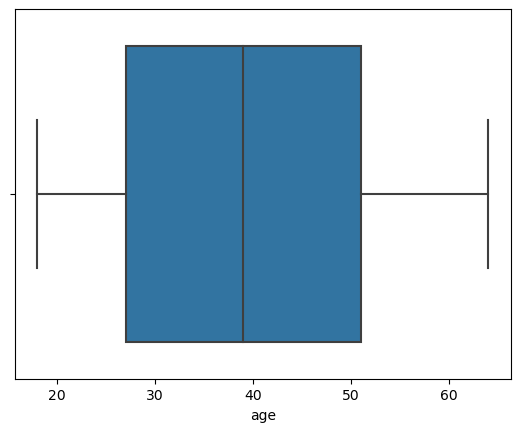

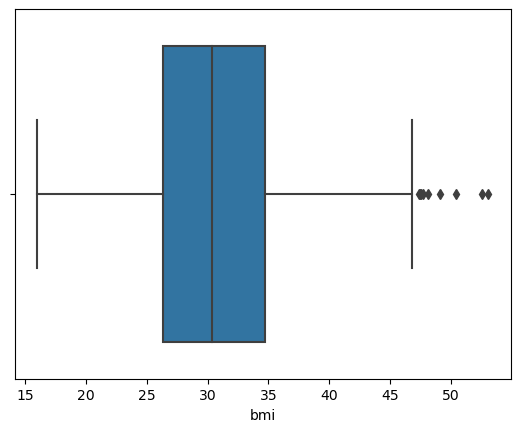

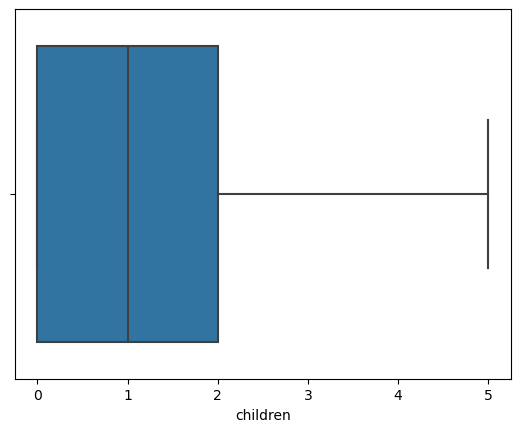

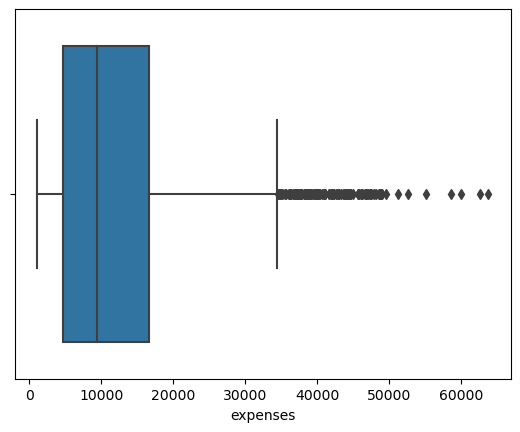

In [17]:
# visualizing outliers
coloumn_list =["age","bmi","children","expenses"]

for i in coloumn_list:
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    plt.show()

In [19]:
#Convert categorical column into dummy/indicator variables

df_encode = df.copy()
df_encode = pd.get_dummies(data=df_encode,columns =["sex","smoker","region"])
df_encode.head()


,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False


In [27]:
from scipy.stats import boxcox
y_bc,lam,ci = boxcox(df_encode["expenses"],alpha =0.05)#95 percent confidence interval

df_encode["expenses"] =np.log(df_encode["expenses"])

df_encode.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expences
0,19,27.9,0,9.734176,True,False,False,True,False,False,False,True,9.734176
1,18,33.8,1,7.453301,False,True,True,False,False,False,True,False,7.453301
2,28,33.0,3,8.400538,False,True,True,False,False,False,True,False,8.400538
3,33,22.7,0,9.998092,False,True,True,False,False,True,False,False,9.998092
4,32,28.9,0,8.260198,False,True,True,False,False,True,False,False,8.260198


In [21]:
from sklearn.model_selection import train_test_split

In [23]:
df_encode.shape

(1338, 13)

In [24]:
df_encode.head()

,age,bmi,children,expenses,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expences
0,19,27.9,0,16884.92,True,False,False,True,False,False,False,True,9.734176
1,18,33.8,1,1725.55,False,True,True,False,False,False,True,False,7.453301
2,28,33.0,3,4449.46,False,True,True,False,False,False,True,False,8.400538
3,33,22.7,0,21984.47,False,True,True,False,False,True,False,False,9.998092
4,32,28.9,0,3866.86,False,True,True,False,False,True,False,False,8.260198


In [25]:
x = df_encode.drop("expenses",axis = 1)
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,expences
0,19,27.9,0,True,False,False,True,False,False,False,True,9.734176
1,18,33.8,1,False,True,True,False,False,False,True,False,7.453301
2,28,33.0,3,False,True,True,False,False,False,True,False,8.400538
3,33,22.7,0,False,True,True,False,False,True,False,False,9.998092
4,32,28.9,0,False,True,True,False,False,True,False,False,8.260198
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,31.0,3,False,True,True,False,False,True,False,False,9.268661
1334,18,31.9,0,True,False,True,False,True,False,False,False,7.698927
1335,18,36.9,0,True,False,True,False,False,False,True,False,7.396231
1336,21,25.8,0,True,False,True,False,False,False,False,True,7.604870


In [28]:
y = df_encode["expenses"]
y

0        9.734176
1        7.453301
2        8.400538
3        9.998092
4        8.260198
          ...    
1333     9.268661
1334     7.698927
1335     7.396231
1336     7.604870
1337    10.279914
Name: expenses, Length: 1338, dtype: float64